# **PROGRAM OCR : KONVERSI TULISAN TANGAN**

In [27]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [28]:
import pytesseract
import numpy as np
from PIL import Image
from google.colab import files
import io
import IPython.display as display

In [29]:
# Fungsi untuk membersihkan gambar dari karakter null byte
def clean_image(image_path):
    img = Image.open(image_path)
    img = img.convert("RGB")

    # Mengubah semua piksel nol menjadi piksel putih (255)
    img_array = np.array(img)
    img_array[img_array == 0] = 255

    # Membuat gambar baru dari array piksel yang telah diubah
    new_img = Image.fromarray(img_array)
    return new_img

Saving word.jpg to word.jpg


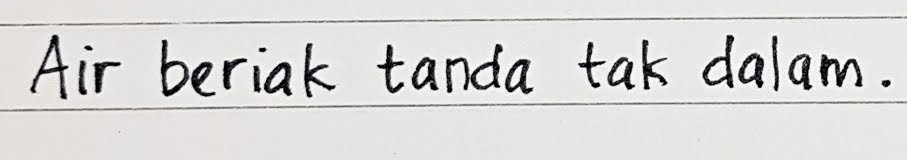

Hasil konversi tulisan tangan ke teks:
 

Air beriak tanda tak dalam.



In [30]:
# Mengunggah gambar tulisan tangan
uploaded = files.upload()

# Mendapatkan path dari file yang diunggah
file_names = list(uploaded.keys())
if len(file_names) > 0:
    uploaded_image_path = file_names[0]

    # Tampilkan gambar yang diunggah
    display.display(display.Image(uploaded_image_path))

    # Membersihkan gambar dari karakter null byte
    cleaned_image = clean_image(uploaded_image_path)

    # Simpan gambar yang telah dibersihkan
    cleaned_image_path = 'cleaned_image.jpg'
    cleaned_image.save(cleaned_image_path)

    # Fungsi untuk melakukan OCR pada gambar
    def image_to_text(image_path):
        img = Image.open(image_path)
        img = img.convert("RGB")

        # Menggunakan pytesseract untuk melakukan OCR
        text = pytesseract.image_to_string(img, lang="eng")
        return text

    # Gunakan gambar yang telah dibersihkan untuk OCR
    result_text = image_to_text(cleaned_image_path)

    print("Hasil konversi tulisan tangan ke teks:")
    print(result_text)
else:
    print("Tidak ada file yang diunggah.")